In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceuticals_merged = pd.merge(mouse_drug, clinical_trial, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pymaceuticals_merged.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanVol = pymaceuticals_merged.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
meanVol = pd.DataFrame(meanVol)

# Preview DataFrame
meanVol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
semVol = pymaceuticals_merged.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
semVol = pd.DataFrame(semVol)

# Preview DataFrame
semVol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
meanVolreformat = meanVol["Tumor Volume (mm3)"].unstack(level=0)
semVolreformat = semVol["Tumor Volume (mm3)"].unstack(level=0)

# Preview that Reformatting worked
meanVolreformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


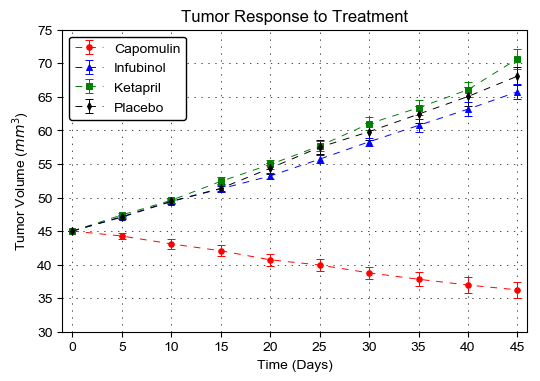

In [5]:
# Generate the Plot (with Error Bars)
mpl.rcParams["figure.dpi"]= 100
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial"]

drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']

x = meanVolreformat.index

for i in range(len(drugs)):
    drug = drugs[i]
    plt.errorbar(x, meanVolreformat[drug], yerr=semVolreformat[drug], linestyle='--', linewidth=0.7, dashes=(7, 7), 
                 color=colors[i], capsize=3, marker=markers[i], markersize=4, markerfacecolor=colors[i], 
                 markeredgecolor=None, markeredgewidth=0.7, capthick=0.7)

plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((30, 75))
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume ($mm^3$)")
plt.title("Tumor Response to Treatment")
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')

# Save the Figure
plt.savefig("Tumor_Volume.png")

# Show the Figure
plt.show()

###### Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metVol = pymaceuticals_merged.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
metVol = pd.DataFrame(metVol)

# Preview DataFrame
metVol.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semMet = pymaceuticals_merged.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
semMet = pd.DataFrame(semMet)

# Preview DataFrame
semMet.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
meanMetreformat = metVol["Metastatic Sites"].unstack(level=0)
semMetreformat = semMet["Metastatic Sites"].unstack(level=0)

# Preview that Reformatting worked
meanMetreformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


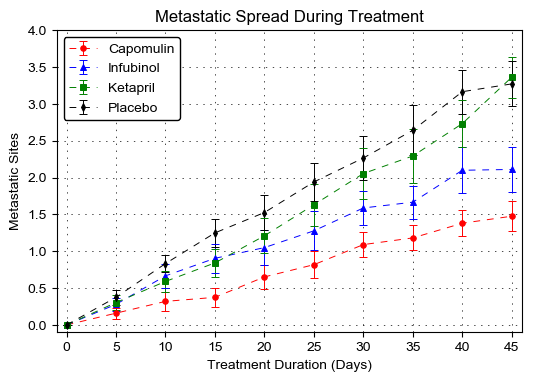

In [9]:
# Generate the Plot (with Error Bars)
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
x = meanMetreformat.index

for i in range(len(drugs)):
    drug = drugs[i]
    plt.errorbar(x, meanMetreformat[drug], yerr=semMetreformat[drug], linestyle='--', linewidth=0.7, 
                 dashes=(7, 7), color=colors[i], capsize=3, marker=markers[i], markersize=4, 
                 markerfacecolor=colors[i], markeredgecolor=None, markeredgewidth=0.7, capthick=0.7)

plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((-0.1, 4))
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Spread During Treatment")
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')

# Save the Figure
plt.savefig("Metastatic_Sites.png")

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
countMice = pymaceuticals_merged.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
survival = pd.DataFrame()
survival["Mouse Count"] = countMice["Mouse ID"].count()

# Preview DataFrame
survival.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
survivalReformat = survival["Mouse Count"].unstack(level=0)

# Preview the Data Frame
survivalReformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


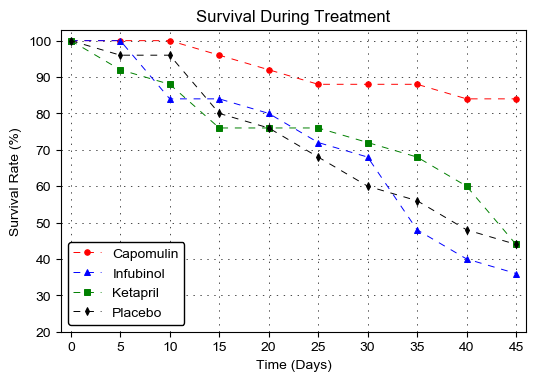

In [12]:
# Generate the Plot (Accounting for percentages)
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
markers = ['o', '^', 's', 'd']
colors = ['r', 'b', 'g', 'k']
x = survivalReformat.index

for i in range(len(drugs)):
    drug = drugs[i]
    survival_rate = survivalReformat[drug] / survivalReformat.loc[0, drug] * 100
    plt.errorbar(x, survival_rate, linestyle='--', linewidth=0.7, 
                 dashes=(7, 7), color=colors[i], marker=markers[i], markersize=4, 
                 markerfacecolor=colors[i], markeredgecolor=None, markeredgewidth=0.7)

plt.xticks(range(0,46,5))    
plt.xlim((-1, 46))
plt.ylim((20, 103))
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.legend(loc='best', framealpha=1, edgecolor='k')
plt.grid(linestyle='--', dashes=(2, 8), linewidth=0.5, color='k')

# Save the Figure
plt.savefig("Survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
group = pymaceuticals_merged.groupby(["Drug", "Timepoint"])
tumor_change = pd.DataFrame()
tumor_change["Tumor Volume"] = group['Tumor Volume (mm3)'].mean()
tumor_change = tumor_change.unstack(level=-1)
tumor_change.columns = tumor_change.columns.droplevel(level=0) 
tumor_change = (tumor_change[45] - tumor_change[0]) / tumor_change[0] * 100

# Display the data to confirm
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

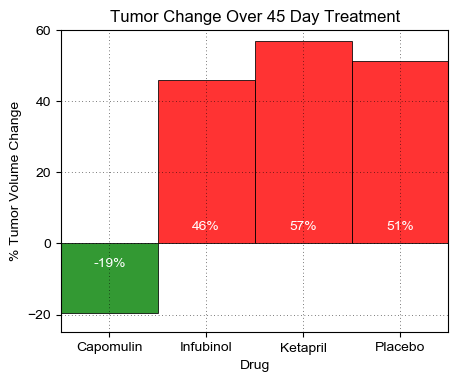

In [14]:
# Store all Relevant Percent Changes into a Tuple
relevant_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Splice the data between passing and failing drugs
changes_relevant = tuple(tumor_change[relevant] for relevant in relevant_drugs)

colors = []
for i in changes_relevant:
   if i < 0:
       colors.append("green")
   else:
       colors.append("red")

ax = tumor_change.loc[relevant_drugs].plot(kind='bar', color=colors, rot=0, legend=False, alpha=0.8,\
                                           edgecolor = 'black', linewidth=0.7, width=1, figsize=(5,4))

# Orient widths. Add labels, tick marks, etc. 
plt.xlim((-0.5, 3.5))
plt.ylim((-25, 60))
plt.yticks(range(-20,70,20))
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid(linestyle='--', dashes=(1, 4), linewidth=0.5, color='black')

# Use functions to label the percentages of changes
# Call functions to implement the function calls
def autolabel(change, xpos='center'):
   posx = range(len(relevant_drugs))
   posy = []
   for i in changes_relevant:
       if i >= 0:
           posy.append(3)
       else:
           posy.append(-4)

   va = []
   for i in changes_relevant:
       if i >= 0:
           va.append("bottom")
       else:
           va.append("top")

   labels = changes_relevant
   for i in range(len(relevant_drugs)):
       ax.text(posx[i], posy[i], '%1.0d%%' % int(labels[i]), ha='center', va=va[i], color='white')

autolabel(ax)

# Save the Figure
plt.savefig("Tumor_Change_Bar.png")

# Show the Figure
plt.show()

#My Analysis

1. All the mice start with a 45 mm3 tumor, however only the drugs Capomulin and Ramicane improved survival and decreased tumor volume.
2. Tumors under Ketapril, Naftisol and Stelasyn seem to increase size even bigger than placebo, which brings concerns with the mechanism of action which may contribute/accelerate the growth of the tumor.
3. On the same note, the drug Ketapril caused more sites of metastases than placebo, which is very concerning. 
4. Drugs like Infubinol and Ketapril allowed the tumor to increase around 50% its size, same as the ones receiving placebo. With drugs Capomulin and Ramicane, the tumor decreased aproximately 20% from its original size in 45 days.